In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from subgroups.utils.plotting import plot_scatter, plot_corr, plot_2D_embedding, plot_cat_continuous, plot_cat_proportions, spectral_no_yellow
from subgroups.datasets.registry import RosmapSingleCellDataset
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import SpectralClustering
from subgroups.utils.plotting import get_corr
from subgroups.utils.plotting import plot_2D_embedding
from subgroups.counterfactuals.counterfactuals import CounterfactualEvaluation

from subgroups.datasamplers.feature_selectors import SelectPCsSingleCell
from sklearn.manifold import SpectralEmbedding
from subgroups.models.classifier import XgbFactory
from sklearn.metrics import roc_auc_score
from subgroups.utils.random import fork_rng
from scipy.stats import chi2_contingency
import pandas as pd

data = RosmapSingleCellDataset(
        path_to_data = '/Users/djuna/Documents/subgroups_data/rosmap_mathys400/normalized_batch_corrected_all_celltypes.npy',
        path_to_meta_data = '/Users/djuna/Documents/subgroups_data/rosmap_mathys400/meta.npy',
        path_to_extended_meta_data = '/Users/djuna/Documents/subgroups_data/rosmap_mathys400/dataset_1282_06-16-2023_long_and_basic_merged_427patients_DianePathAnno_Sorted_DC_2024_06_16.csv',
        path_to_projid_dictionary = '/Users/djuna/Documents/subgroups_data/rosmap_mathys400/variable_encodings/projid_dictionary.npy'
    )

# --- colormap ---
cmap = spectral_no_yellow()
pal8 = cmap(np.linspace(0, 1, 8))
purple2, green2, blue2 = pal8[0], pal8[3], pal8[6]
cols = [purple2, green2, blue2]

Plotting SNR-results

In [3]:
path = '/Users/djuna/Documents/temp/results/rosmap_singlecell_experiment_june_30/snr_outputs/combined_snr_outputs.npy'
snr_data = np.load(path)

In [17]:
index = np.where((snr_data['snr_']>5) & (snr_data['snr_']<10))[0]
point3 = snr_data[index[snr_data[index]['test_accuracy_'].argmax()]]
point3

np.void((5.0, 0.6969444155693054, 5.122597792311005, 0.3190159948034689, 7), dtype=[('n_pcs_', '<f8'), ('test_accuracy_', '<f8'), ('snr_', '<f8'), ('alpha_', '<f8'), ('max_depth_', '<i8')])

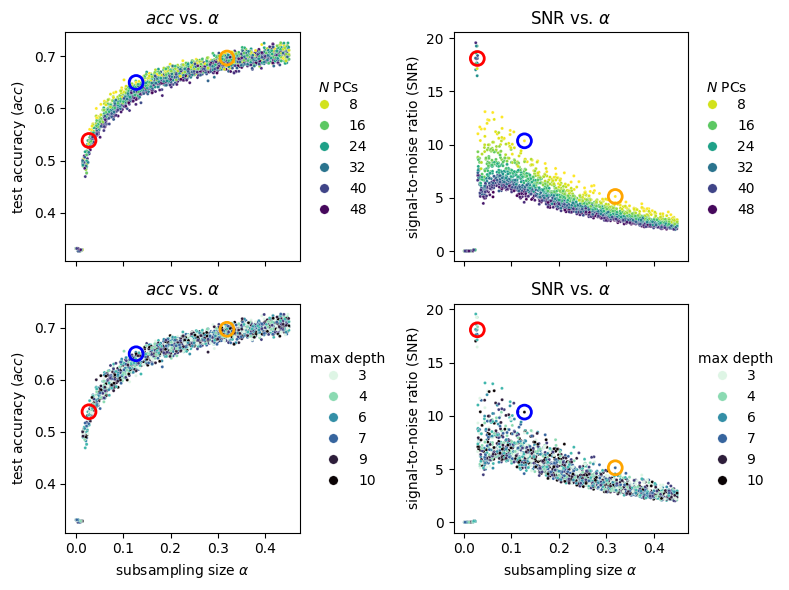

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True)
index = np.where(snr_data['snr_']>15)[0]
point1 = snr_data[index[snr_data[index]['test_accuracy_'].argmax()]]
index = np.where((snr_data['snr_']>10) & (snr_data['snr_']<15))[0]
point2 = snr_data[index[snr_data[index]['test_accuracy_'].argmax()]]
index = np.where((snr_data['snr_']>5) & (snr_data['snr_']<10))[0]
point3 = snr_data[index[snr_data[index]['test_accuracy_'].argmax()]]

plot_scatter(
    x=snr_data['alpha_'], 
    y=snr_data['test_accuracy_'], 
    hue=snr_data['n_pcs_'], 
    xlabel='subsampling size $\\alpha$', 
    ylabel='test accuracy ($acc$)', 
    title='$acc$ vs. $\\alpha$',
    legend_title='$N$ PCs',
    ax=axes[0,0],
    highlight_point=(point1['alpha_'], point1['test_accuracy_']),
    highlight_point1=(point2['alpha_'], point2['test_accuracy_']),
    highlight_point2=(point3['alpha_'], point3['test_accuracy_'])
)

plot_scatter(
    x=snr_data['alpha_'], 
    y=snr_data['snr_'], 
    hue=snr_data['n_pcs_'], 
    xlabel='subsampling size $\\alpha$', 
    ylabel='signal-to-noise ratio (SNR)', 
    title='SNR vs. $\\alpha$',
    legend_title='$N$ PCs',
    ax=axes[0,1],
    highlight_point=(point1['alpha_'], point1['snr_']),
    highlight_point1=(point2['alpha_'], point2['snr_']),
    highlight_point2=(point3['alpha_'], point3['snr_'])

)

plot_scatter(
    x=snr_data['alpha_'], 
    y=snr_data['test_accuracy_'], 
    hue=snr_data['max_depth_'], 
    xlabel='subsampling size $\\alpha$', 
    ylabel='test accuracy ($acc$)', 
    title='$acc$ vs. $\\alpha$',
    legend_title='max depth',
    ax=axes[1,0],
    cmap='mako_r',
    highlight_point=(point1['alpha_'], point1['test_accuracy_']),
    highlight_point1=(point2['alpha_'], point2['test_accuracy_']),
    highlight_point2=(point3['alpha_'], point3['test_accuracy_'])
)

plot_scatter(
    x=snr_data['alpha_'], 
    y=snr_data['snr_'], 
    hue=snr_data['max_depth_'], 
    xlabel='subsampling size $\\alpha$', 
    ylabel='signal-to-noise ratio (SNR)', 
    title='SNR vs. $\\alpha$',
    legend_title='max depth',
    ax=axes[1,1],
    cmap='mako_r',
    highlight_point=(point1['alpha_'], point1['snr_']),
    highlight_point1=(point2['alpha_'], point2['snr_']),
    highlight_point2=(point3['alpha_'], point3['snr_'])
)

plt.tight_layout()
plt.savefig('/Users/djuna/Documents/Maydell-MIT-PhD-Thesis/MIT-thesis-template/ch4_figs/snr_rosmap_singlecell_experiment_june_30.png', dpi=300)


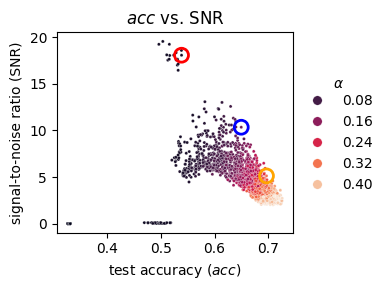

In [20]:
plot_scatter(
    x=snr_data['test_accuracy_'], 
    y=snr_data['snr_'], 
    hue=snr_data['alpha_'], 
    xlabel='test accuracy ($acc$)', 
    ylabel='signal-to-noise ratio (SNR)', 
    title='$acc$ vs. SNR',
    legend_title='$\\alpha$',
    cmap='rocket',
    highlight_point=(point1['test_accuracy_'], point1['snr_']),
    highlight_point1=(point2['test_accuracy_'], point2['snr_']),
    highlight_point2=(point3['test_accuracy_'], point3['snr_'])
)

plt.tight_layout()
plt.savefig('/Users/djuna/Documents/Maydell-MIT-PhD-Thesis/MIT-thesis-template/ch4_figs/acc_vs_snr_rosmap_singlecell_experiment_june_30.png', dpi=300)


Load datamodels results

In [2]:
# get indices
index_grp_1 = (data.coarse_labels)
index_grp_2 = np.invert(index_grp_1)

# get point 1 results
point_1_path = '/Users/djuna/Documents/temp/results/rosmap_singlecell_experiment_june_30_point_1'
point_1_results = {
    'weights': np.load(os.path.join(point_1_path, 'datamodel_outputs', 'batch_0_weights.npy')),
    'pearson_corr': np.load(os.path.join(point_1_path, 'datamodel_outputs', 'batch_0_pearson_correlations.npy')),
    'spearman_corr': np.load(os.path.join(point_1_path, 'datamodel_outputs', 'batch_0_spearman_correlations.npy'))
}

# get point 2 results
point_2_path = '/Users/djuna/Documents/temp/results/rosmap_singlecell_experiment_june_30'
point_2_results = {
    'weights': np.load(os.path.join(point_2_path, 'datamodel_outputs', 'batch_0_weights.npy')),
    'pearson_corr': np.load(os.path.join(point_2_path, 'datamodel_outputs', 'batch_0_pearson_correlations.npy')),
    'spearman_corr': np.load(os.path.join(point_2_path, 'datamodel_outputs', 'batch_0_spearman_correlations.npy'))
}

# get point 3 results
point_3_path = '/Users/djuna/Documents/temp/results/rosmap_singlecell_experiment_june_30_point_3'
point_3_results = {
    'weights': np.load(os.path.join(point_3_path, 'datamodel_outputs', 'batch_0_weights.npy')),
    'pearson_corr': np.load(os.path.join(point_3_path, 'datamodel_outputs', 'batch_0_pearson_correlations.npy')),
    'spearman_corr': np.load(os.path.join(point_3_path, 'datamodel_outputs', 'batch_0_spearman_correlations.npy'))
}




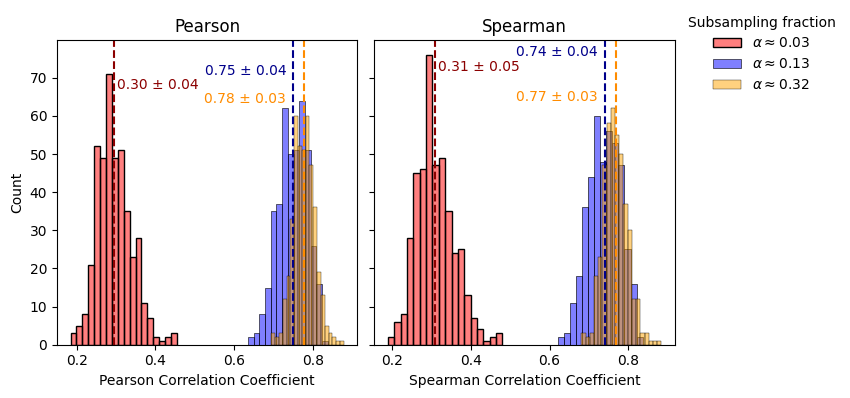

In [ ]:

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

# --- Pearson plot ---
ax = axes[0]
mean1 = np.mean(point_1_results['pearson_corr'])
std1 = np.std(point_1_results['pearson_corr'])
sns.histplot(point_1_results['pearson_corr'], color='red', alpha=0.5, ax=ax, label=r'$\alpha \approx 0.03$')
ax.axvline(x=mean1, color='darkred', linestyle='--')
ax.text(mean1 + 0.11, ax.get_ylim()[1] * 0.9, f'{mean1:.2f} ± {std1:.2f}', color='darkred', ha='center')

mean2 = np.mean(point_2_results['pearson_corr'])
std2 = np.std(point_2_results['pearson_corr'])
sns.histplot(point_2_results['pearson_corr'], color='blue', alpha=0.5, ax=ax, label=r'$\alpha \approx 0.13$')
ax.axvline(x=mean2, color='darkblue', linestyle='--')
ax.text(mean2 - 0.12, ax.get_ylim()[1] * 0.95, f'{mean2:.2f} ± {std2:.2f}', color='darkblue', ha='center')

mean3 = np.mean(point_3_results['pearson_corr'])
std3 = np.std(point_3_results['pearson_corr'])
sns.histplot(point_3_results['pearson_corr'], color='orange', alpha=0.5, ax=ax, label=r'$\alpha \approx 0.32$')
ax.axvline(x=mean3, color='darkorange', linestyle='--')
ax.text(mean3 - 0.15, ax.get_ylim()[1] * 0.85, f'{mean3:.2f} ± {std3:.2f}', color='darkorange', ha='center')

ax.set_xlabel('Pearson Correlation Coefficient')
ax.set_title('Pearson')

# --- Spearman plot ---
ax2 = axes[1]
mean1_s = np.mean(point_1_results['spearman_corr'])
std1_s = np.std(point_1_results['spearman_corr'])
sns.histplot(point_1_results['spearman_corr'], color='red', alpha=0.5, ax=ax2)
ax2.axvline(x=mean1_s, color='darkred', linestyle='--')
ax2.text(mean1_s + 0.11, ax2.get_ylim()[1] * 0.9, f'{mean1_s:.2f} ± {std1_s:.2f}', color='darkred', ha='center')

mean2_s = np.mean(point_2_results['spearman_corr'])
std2_s = np.std(point_2_results['spearman_corr'])
sns.histplot(point_2_results['spearman_corr'], color='blue', alpha=0.5, ax=ax2)
ax2.axvline(x=mean2_s, color='darkblue', linestyle='--')
ax2.text(mean2_s - 0.12, ax2.get_ylim()[1] * 0.95, f'{mean2_s:.2f} ± {std2_s:.2f}', color='darkblue', ha='center')

mean3_s = np.mean(point_3_results['spearman_corr'])
std3_s = np.std(point_3_results['spearman_corr'])
sns.histplot(point_3_results['spearman_corr'], color='orange', alpha=0.5, ax=ax2)
ax2.axvline(x=mean3_s, color='darkorange', linestyle='--')
ax2.text(mean3_s - 0.15, ax2.get_ylim()[1] * 0.8, f'{mean3_s:.2f} ± {std3_s:.2f}', color='darkorange', ha='center')

ax2.set_xlabel('Spearman Correlation Coefficient')
ax2.set_title('Spearman')

# Shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Subsampling fraction', bbox_to_anchor=(0.85, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.savefig('/Users/djuna/Documents/Maydell-MIT-PhD-Thesis/MIT-thesis-template/ch4_figs/corr_by_subsampling_fraction.png', dpi=300)
plt.show()


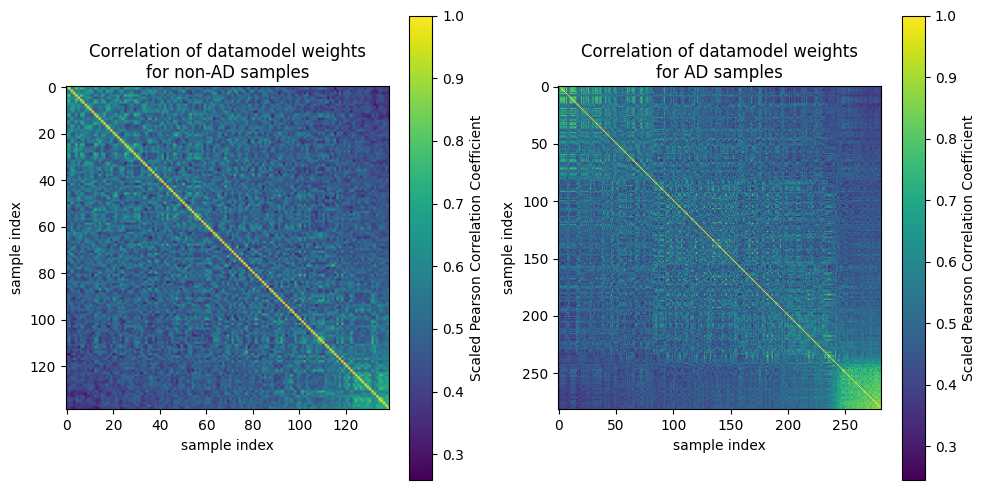

In [5]:

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plot_corr(point_3_results['weights'], index_grp_1, 'Correlation of datamodel weights\nfor AD samples', ax=axes[1], fig=fig)
plot_corr(point_3_results['weights'], index_grp_2, 'Correlation of datamodel weights\nfor non-AD samples', ax=axes[0], fig=fig)
plt.tight_layout()
plt.savefig('/Users/djuna/Documents/Maydell-MIT-PhD-Thesis/MIT-thesis-template/ch4_figs/rosmap_subset_corr.png', dpi=300)



show pathology-related

In [16]:
np.unique(diagnosis,return_counts=True)[0], np.unique(diagnosis,return_counts=True)[1]

(array(['AD + DLB', 'AD only', 'DLB only', 'Dementia due to other cause',
        'MCI due to other cause', 'No AD, No DLB',
        'Questionable - last cog test many years before death'],
       dtype='<U52'),
 array([ 38, 203,  13,  20,   3, 139,   5]))

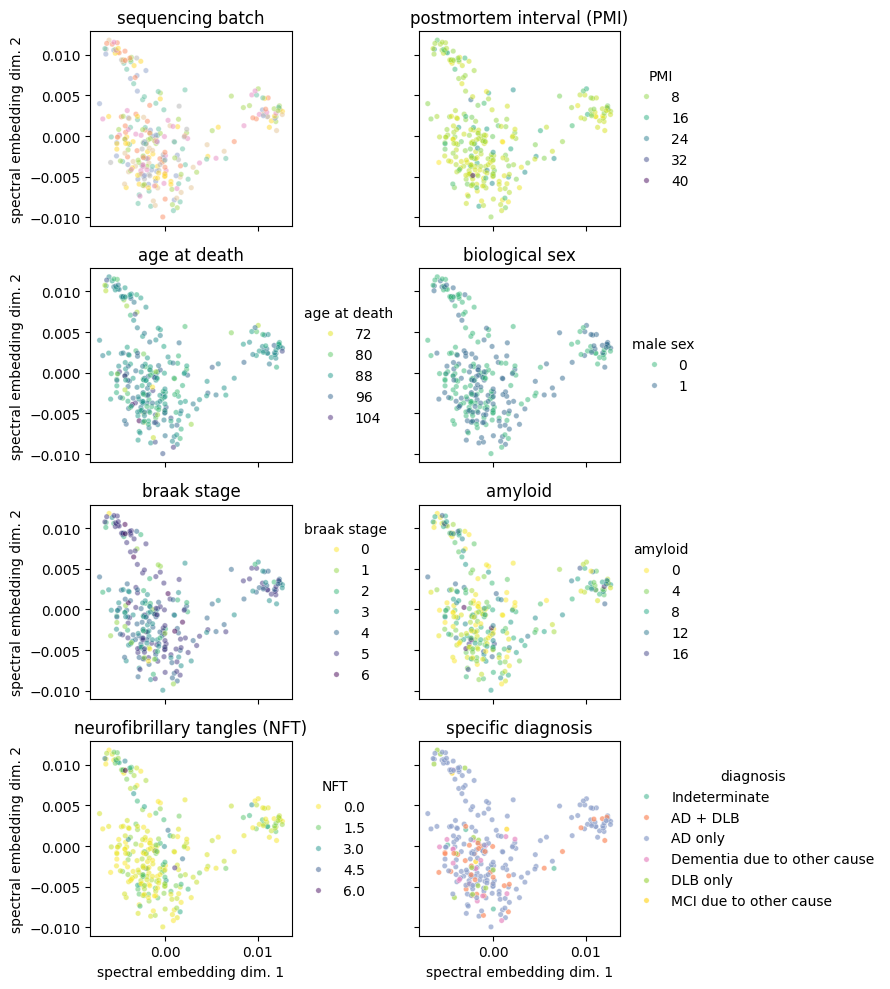

In [20]:
import pandas as pd
meta = pd.read_csv('../results/Fastq_paths_432_PFC_HM_updated_edited.csv')
dictionary = dict(zip(meta['projid'], meta['Batch']))
seq_batch = np.array([dictionary[x] for x in data.descriptive_data['projid']])

dictionary = {0: 'No AD, No DLB', 1: 'AD only', 2: 'DLB only', 3: 'AD + DLB', 4: 'MCI due to other cause', 5: 'Dementia due to other cause', 6: 'Indeterminate'}
diagnosis = np.array([dictionary[x] for x in data.descriptive_data['AD_DLB_diagnosis']])

fig, axes = plt.subplots(4, 2, figsize=(9, 10), sharey=True, sharex=True)
weights = point_3_results['weights']

plot_2D_embedding(weights, index_grp_1, seq_batch[(index_grp_1)], 'sequencing batch', 'seq_batch', ax=axes[0,0], cmap = 'Set2', s=15, show_legend=False, alpha=0.5)
plot_2D_embedding(weights, index_grp_1, data.descriptive_data['pmi'][(index_grp_1)], 'postmortem interval (PMI)', 'PMI', ax=axes[0,1], s=15, alpha=0.5)
plot_2D_embedding(weights, index_grp_1, data.descriptive_data['age_death'][(index_grp_1)], 'age at death', 'age at death', ax=axes[1,0], s=15, alpha=0.5)
plot_2D_embedding(weights, index_grp_1, data.descriptive_data['msex'][(index_grp_1)], 'biological sex', 'male sex', ax=axes[1,1], s=15, alpha=0.5)
plot_2D_embedding(weights, index_grp_1, data.descriptive_data['braaksc'][(index_grp_1)], 'braak stage', 'braak stage', ax=axes[2,0], s=15, alpha=0.5)
plot_2D_embedding(weights, index_grp_1, data.descriptive_data['amyloid'][(index_grp_1)], 'amyloid', 'amyloid', ax=axes[2,1], s=15, alpha=0.5)
plot_2D_embedding(weights, index_grp_1, data.descriptive_data['nft'][(index_grp_1)], 'neurofibrillary tangles (NFT)', 'NFT', ax=axes[3,0], s=15, alpha=0.5)
plot_2D_embedding(weights, index_grp_1, diagnosis[(index_grp_1)], 'specific diagnosis', 'diagnosis', cmap = 'Set2', ax=axes[3,1], s=15, alpha=0.7)

# have to plot seq batch as well
plt.tight_layout()
plt.savefig('/Users/djuna/Documents/Maydell-MIT-PhD-Thesis/MIT-thesis-template/ch4_figs/rosmap_embeddings.png', dpi=300)


Counterfactual experiment

In [3]:
# --- Spectral clustering ---
weights = point_3_results['weights']

corr = get_corr(weights, index_grp_1)
spectral = SpectralClustering(
    n_clusters=3,           # number of clusters you expect
    affinity='precomputed',  # or 'rbf'
    assign_labels='kmeans', # how to assign labels after embedding
    random_state=0
)
# get partitions
partitions = spectral.fit_predict(corr)

# --- Counterfactual analysis ---
pc_indices = SelectPCsSingleCell().feature_indices(n_pcs=5)
counterfactual_estimator = CounterfactualEvaluation(features=data.features[:,pc_indices],
                                                        coarse_labels=data.coarse_labels,
                                                        train_size=17,
                                                        test_size=26,
                                                        classifier=XgbFactory(max_depth=7))

In [38]:
n_iter = 1000

In [39]:
# --- Counterfactual analysis: cluster 0 ---
children = fork_rng(np.random.default_rng(0), 2)
partition = np.zeros_like(data.coarse_labels)
partition[index_grp_1] = partitions == 0
res_clust_0 = counterfactual_estimator.counterfactual_evaluation(partition, model_rng=children[0], shuffle_rng=children[1], n_iter=n_iter)

# --- Counterfactual analysis: cluster 1 ---
partition = np.zeros_like(data.coarse_labels)
partition[index_grp_1] = partitions == 1
res_clust_1 = counterfactual_estimator.counterfactual_evaluation(partition, model_rng=children[0], shuffle_rng=children[1], n_iter=n_iter)

# --- Counterfactual analysis: cluster 2 ---
partition = np.zeros_like(data.coarse_labels)
partition[index_grp_1] = partitions == 2
res_clust_2 = counterfactual_estimator.counterfactual_evaluation(partition, model_rng=children[0], shuffle_rng=children[1], n_iter=n_iter)

# group all results
res_clust_1['cluster'] = 1
res_clust_2['cluster'] = 2
res_clust_0['cluster'] = 0
res = pd.concat([res_clust_1, res_clust_2, res_clust_0])
res['type'] = 'datamodels'

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.features)
pca = PCA(n_components=np.sum(data.coarse_labels))  # adjust n_components as needed
X_pca = pca.fit_transform(X_scaled)

def get_corr_pca(weights, index):
    corr = np.corrcoef(weights[(index)])
    corr = (corr+1)/2
    return corr

corr = get_corr_pca(X_pca, index_grp_1)
spectral = SpectralClustering(
    n_clusters=3,           # number of clusters you expect
    affinity='precomputed',  # or 'rbf'
    assign_labels='kmeans', # how to assign labels after embedding
    random_state=0
)
# get partitions
partitions_pca = spectral.fit_predict(corr)

# --- Counterfactual analysis PCA: cluster 0 ---
children = fork_rng(np.random.default_rng(0), 2)
partition = np.zeros_like(data.coarse_labels)
partition[index_grp_1] = partitions_pca == 0
pca_res_clust_0 = counterfactual_estimator.counterfactual_evaluation(partition, model_rng=children[0], shuffle_rng=children[1], n_iter=n_iter)

# --- Counterfactual analysis PCA: cluster 1 ---
partition = np.zeros_like(data.coarse_labels)
partition[index_grp_1] = partitions_pca == 1
pca_res_clust_1 = counterfactual_estimator.counterfactual_evaluation(partition, model_rng=children[0], shuffle_rng=children[1], n_iter=n_iter)

# --- Counterfactual analysis PCA: cluster 2 ---
partition = np.zeros_like(data.coarse_labels)
partition[index_grp_1] = partitions_pca == 2
pca_res_clust_2 = counterfactual_estimator.counterfactual_evaluation(partition, model_rng=children[0], shuffle_rng=children[1], n_iter=n_iter)

# group all results
pca_res_clust_1['cluster'] = 1
pca_res_clust_2['cluster'] = 2
pca_res_clust_0['cluster'] = 0
pca_res = pd.concat([pca_res_clust_1, pca_res_clust_2, pca_res_clust_0])
pca_res['type'] = 'PCA'

In [41]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn import set_config
from tqdm import tqdm
#set_config(display='text')

n_iter = 1000
all_aucs = []

for i in tqdm(range(n_iter)):
    children = fork_rng(np.random.default_rng(i), 3)

    X_tr, X_te, y_tr, y_te = train_test_split(
        data.features, data.coarse_labels,
        test_size=0.7,
        stratify=data.coarse_labels,        # <-- ensures y’s class distribution is preserved
        shuffle=True,
        random_state=np.random.RandomState(children[0].bit_generator)
    )

    rus = RandomUnderSampler(random_state=np.random.RandomState(children[1].bit_generator))
    X_tr_bal, y_tr_bal = rus.fit_resample(X_tr, y_tr)

    model = XgbFactory(max_depth=7).build_model(rng=np.random.default_rng(children[2]))
    model.fit(X_tr_bal, y_tr_bal)
    pred = model.predict_proba(X_te)
    auc = roc_auc_score(y_te, pred[:,1])
    all_aucs.append(auc)

res_baseline = pd.DataFrame(np.hstack(all_aucs), columns = ['mean_auc'])
res_baseline['type'] = 'baseline'
res_baseline['seed'] = np.arange(len(res_baseline))
res_baseline['prob_type'] = 'not applicable'

100%|██████████| 1000/1000 [02:46<00:00,  5.99it/s]


In [42]:
def av_results(res):
    avg_auc = (
        res
        .groupby(['seed', 'prob_type', 'cluster', 'type'], as_index=False)['auc']
        .mean()
        .rename(columns={'auc': 'mean_auc'})
    )
    avg_auc = (
        avg_auc
        .groupby(['seed', 'prob_type', 'type'], as_index=False)['mean_auc']
        .mean()
    )
    return avg_auc

avg_auc = av_results(res)
avg_auc_pca = av_results(pca_res)
all_res = pd.concat([avg_auc, avg_auc_pca])

all_res = pd.concat([all_res, res_baseline])

In [45]:
all_res.index = np.arange(len(all_res))

In [49]:
all_res['type'].unique()

array(['datamodels', 'PCA', 'baseline'], dtype=object)

/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1732092685.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1732092685.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1732092685.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1732092685.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated

baseline vs. PCA: Mann-Whitney-Wilcoxon test two-sided, P_val:9.529e-212 U_stat=9.897e+04
PCA vs. datamodels: Mann-Whitney-Wilcoxon test two-sided, P_val:5.685e-192 U_stat=1.184e+05
baseline vs. datamodels: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=4.416e+03
baseline vs. PCA: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=9.896e+05
PCA vs. datamodels: Mann-Whitney-Wilcoxon test two-sided, P_val:4.340e-92 U_stat=7.628e+05
baseline vs. datamodels: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=9.984e+05
PCA vs. datamodels: Mann-Whitney-Wilcoxon test two-sided, P_val:3.399e-260 U_stat=5.504e+04


/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1732092685.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1732092685.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


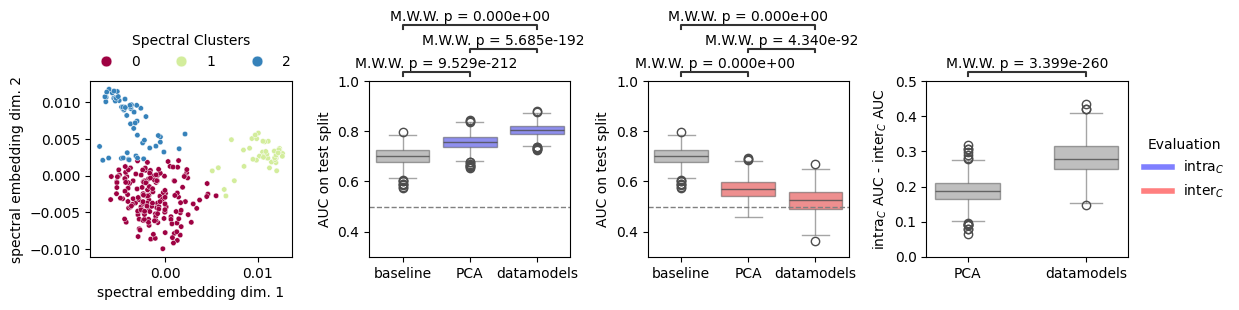

In [51]:
# plot partitions
fig, axes = plt.subplots(1, 4, figsize=(12.5, 3.5), sharey=False, sharex=False)
plot_2D_embedding(weights, index_grp_1, partitions, '', 'clusters', cmap = [purple2, green2, blue2], s=15, alpha=1, ax=axes[0])

plot_cat_continuous(
        data=all_res[all_res['prob_type']!='probabilities_outside_split'],
        cat_col='type',
        cont_col='mean_auc',
        test='Mann-Whitney',
        text_format='full',
        palette=['grey', 'blue', 'blue'],
        ax=axes[1],
        y_lower=0.3,
        y_upper=1,
        loc='outside',
        boxplot_kwargs={
            'boxprops':     {'alpha': 0.5},
            'whiskerprops': {'alpha': 0.5},
            'capprops':     {'alpha': 0.5},
            'medianprops':  {'alpha': 0.8},
            'width': 0.8
        },
        order = ['baseline', 'PCA', 'datamodels'],
        stripplot_kwargs={'alpha': 0.6, 'size': 0}
    )

plot_cat_continuous(
        data=all_res[all_res['prob_type']!='probabilities_on_split'],
        cat_col='type',
        cont_col='mean_auc',
        test='Mann-Whitney',
        text_format='full',
        palette=['grey', 'red', 'red'],
        ax=axes[2],
        y_lower=0.3,
        y_upper=1,
        boxplot_kwargs={
            'boxprops':     {'alpha': 0.5},
            'whiskerprops': {'alpha': 0.5},
            'capprops':     {'alpha': 0.5},
            'medianprops':  {'alpha': 0.8},
            'width': 0.8
        },
        order = ['baseline', 'PCA', 'datamodels'],
        stripplot_kwargs={'alpha': 0.6, 'size': 0}
    )

# plot diffs in AUC

out = []

for i in ['datamodels', 'PCA']:
    temp = all_res[all_res['type']==i]

    df_pivot = temp.pivot(index='seed', 
                        columns='prob_type', 
                        values='mean_auc')

    # compute on – out
    df_pivot['on_minus_out'] = (
        df_pivot['probabilities_on_split']
        - df_pivot['probabilities_outside_split']
    )

    result = df_pivot[['on_minus_out']].reset_index()
    result['type'] = i
    out.append(result)

out = pd.concat(out)

plot_cat_continuous(
        data=out,
        cat_col='type',
        cont_col='on_minus_out',
        test='Mann-Whitney',
        text_format='full',
        palette=['grey', 'grey'],
        ax=axes[3],
        boxplot_kwargs={
            'boxprops':     {'alpha': 0.5},
            'whiskerprops': {'alpha': 0.5},
            'capprops':     {'alpha': 0.5},
            'medianprops':  {'alpha': 0.8},
            'width': 0.55
        },
        y_lower=0,
        y_upper=0.5,
        order = ['PCA', 'datamodels'],
        stripplot_kwargs={'alpha': 0.6, 'size': 0}
    )

for ax in axes[1:]:
    ax.set_xlabel('')
    ax.set_ylabel('')

axes[1].set_ylabel('AUC')

line1, = axes[-1].plot(0, 0, lw=4, color='blue', alpha=0.5)
line2, = axes[-1].plot(0, 0, lw=4, color='red', alpha=0.5)

# now add a manual legend to just that last subplot:
axes[-1].legend(
    [line1, line2],               # the “handles”
    [r'intra$_C$', r'inter$_C$'],       # the “labels”
    loc='center left',           # anchor the legend’s center‐left
    bbox_to_anchor=(1.02, 0.5),         # position
    title='Evaluation',           # optional title
    frameon=False,                 # draw a box around it
    fontsize='medium'              # adjust text size
)

axes[1].set_ylabel('AUC on test split')
axes[2].set_ylabel('AUC on test split')
axes[3].set_ylabel(r'intra$_C$ AUC - inter$_C$ AUC')

axes[0].legend(
       # the “labels”
    title='Spectral Clusters',
    ncol=3,
    loc='lower center', 
    markerscale=2,
    frameon=False,
    bbox_to_anchor=(0.5, 1)          # adjust text size
)

axes[1].axhline(y=0.5, color='gray', linestyle='--', linewidth=1)
axes[2].axhline(y=0.5, color='gray', linestyle='--', linewidth=1)

plt.tight_layout()
plt.savefig('/Users/djuna/Documents/Maydell-MIT-PhD-Thesis/MIT-thesis-template/ch4_figs/rosmap_aucs.png', dpi=300)


Plot cont metadata by split

In [4]:
meta = pd.DataFrame(data.descriptive_data[index_grp_1])
meta['label'] = partitions

/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1732092685.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1732092685.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1732092685.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1732092685.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated

0 vs. 1: Mann-Whitney-Wilcoxon test two-sided, P_val:7.803e-01 U_stat=3.764e+03
1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:3.159e-01 U_stat=1.100e+03
0 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:9.191e-02 U_stat=4.451e+03
0 vs. 1: Mann-Whitney-Wilcoxon test two-sided, P_val:7.052e-01 U_stat=3.746e+03
1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:6.429e-01 U_stat=1.315e+03
0 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:6.824e-01 U_stat=5.437e+03
0 vs. 1: Mann-Whitney-Wilcoxon test two-sided, P_val:4.667e-02 U_stat=3.132e+03
1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:4.355e-01 U_stat=1.361e+03
0 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:3.280e-01 U_stat=4.801e+03
0 vs. 1: Mann-Whitney-Wilcoxon test two-sided, P_val:2.642e-01 U_stat=3.464e+03
1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:5.031e-01 U_stat=1.149e+03
0 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:8.568e-02 U_stat=4.461e+03


/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1732092685.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1732092685.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


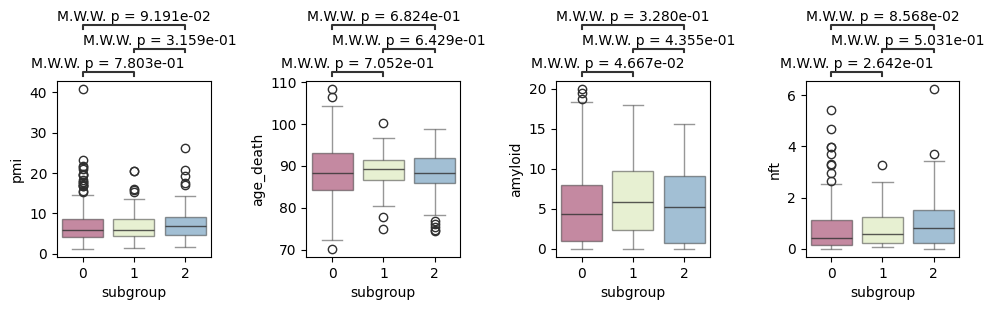

In [53]:
fig, axes = plt.subplots(1, 4, figsize=(10, 3.5), sharey=False, sharex=True)

# flatten into a 1-D array of length 8
axes_flat = axes.flatten()

variables = ['pmi', 'age_death','amyloid', 'nft']

# only take the first 5 axes (or whatever subset you need)
for ax, var in zip(axes_flat[:len(variables)], variables):
    plot_cat_continuous(
        data=meta,
        cat_col='label',
        cont_col=var,
        test='Mann-Whitney',
        text_format='full',
        palette=cols,
        ax=ax,
        boxplot_kwargs={
            'boxprops':     {'alpha': 0.5},
            'whiskerprops': {'alpha': 0.5},
            'capprops':     {'alpha': 0.5},
            'medianprops':  {'alpha': 0.8},
            'width': 0.8
        },
        stripplot_kwargs={'alpha': 0.6, 'size': 0}
    )
    ax.set_xlabel('subgroup')
    #ax.set_title(var)

plt.tight_layout()
#plt.show()
plt.savefig('/Users/djuna/Documents/Maydell-MIT-PhD-Thesis/MIT-thesis-template/ch4_figs/rosmap_cont_meta.png', dpi=300)



Plot cat metadata by split

0	No AD, No DLB
1	AD only
2	DLB only
3	AD + DLB
4	MCI due to other cause
5	Dementia due to other cause
6	Questionable - last cog test many years before death

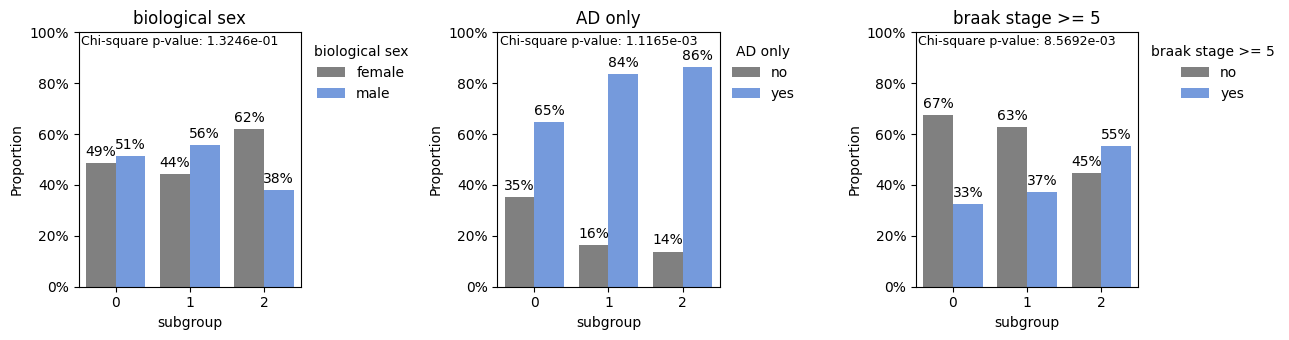

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(13, 3.5), sharey=False, sharex=True)

# flatten into a 1-D array of length 8
axes_flat = axes.flatten()

meta['AD diagnosis'] = ['AD' if x in set([1,3]) else 'other' for x in meta['AD_DLB_diagnosis']]
meta['DLB diagnosis'] = ['DLB' if x in set([2,3]) else 'other' for x in meta['AD_DLB_diagnosis']]
meta['AD only'] = ['yes' if x in set([1]) else 'no' for x in meta['AD_DLB_diagnosis']]
meta['braak stage >= 5'] = ['yes' if x in set([5,6]) else 'no' for x in meta['braaksc']]

meta['biological sex'] = ['male' if x==1 else 'female' for x in meta['msex']]
variables = ['biological sex', 'AD only', 'braak stage >= 5']

# only take the first 5 axes (or whatever subset you need)
for ax, var in zip(axes_flat[:len(variables)], variables):
    plot_cat_proportions(
        data=meta,
        cat_col='label',
        hue_col=var,
        palette=['grey', 'cornflowerblue'],
        ax=ax
    )
    ax.set_xlabel('subgroup')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False, title=var)
    # Annotation with test results
    table = pd.crosstab(meta['label'], meta[var])

    chi2, p, dof, expected = chi2_contingency(table)
    textstr = (
       # f"Chi-square statistic: {chi2:.4f}\n"
        f"Chi-square p-value: {p:.4e}"
    )
    #props = dict(boxstyle='round',facecolor='white', alpha=0.5)
    ax.text(0.9, 0.99, textstr, transform=ax.transAxes, size=9,
            ha='right', va='top')


    ax.set_title(var)
plt.tight_layout()

plt.savefig('/Users/djuna/Documents/Maydell-MIT-PhD-Thesis/MIT-thesis-template/ch4_figs/rosmap_cat_meta.png', dpi=300)



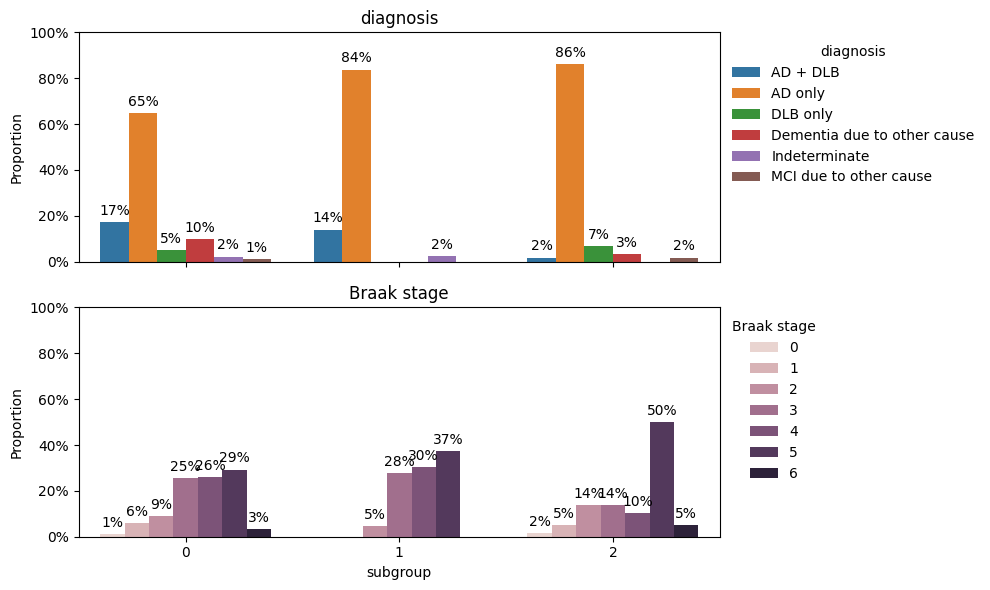

In [84]:
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharey=False, sharex=True)

# flatten into a 1-D array of length 8
axes_flat = axes.flatten()
meta['Braak stage'] = meta['braaksc']
dictionary = {0: 'No AD, No DLB', 1: 'AD only', 2: 'DLB only', 3: 'AD + DLB', 4: 'MCI due to other cause', 5: 'Dementia due to other cause', 6: 'Indeterminate'}
diagnosis = np.array([dictionary[x] for x in data.descriptive_data['AD_DLB_diagnosis'][index_grp_1]])

meta['diagnosis'] = diagnosis
variables = ['diagnosis', 'Braak stage']

# only take the first 5 axes (or whatever subset you need)
for ax, var in zip(axes_flat[:len(variables)], variables):
    plot_cat_proportions(
        data=meta,
        cat_col='label',
        hue_col=var,
        ax=ax
    )
    ax.set_xlabel('subgroup')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False, title=var)
    # Annotation with test results

    ax.set_title(var)
plt.tight_layout()

plt.savefig('/Users/djuna/Documents/Maydell-MIT-PhD-Thesis/MIT-thesis-template/ch4_figs/rosmap_cat_meta2.png', dpi=300)



Examine genetic differences

In [387]:
meta['APOE'] = ['E4' if x in set([34, 24, 44]) else 'E3' for x in meta['apoe_genotype']]

# --- rs3752246 ---
geno = pd.read_csv('../../subgroups_data/rosmap_wgs/HIGHandMED_coding_annotations_syn11724057_subset.csv')
mapping = pd.read_csv('../../subgroups_data/rosmap_wgs/WGS_sample_QC_info.csv')
dictionary = dict(zip(mapping['projid'], mapping['WGS_id']))
meta['WGS_id'] = meta['projid'].map(dictionary)
rs = geno[geno['ID']=='rs3752246'].T
dictionary = dict(zip(rs.index, rs[137798]))
meta['rs3752246'] = meta['WGS_id'].map(dictionary)
meta['ABCA7'] = ['p.1527Gly' if x!='1/1' else 'p.1527Ala' for x in meta['rs3752246']]

/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/4018720290.py:4: DtypeWarning: Columns (6,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  geno = pd.read_csv('../../subgroups_data/rosmap_wgs/HIGHandMED_coding_annotations_syn11724057_subset.csv')


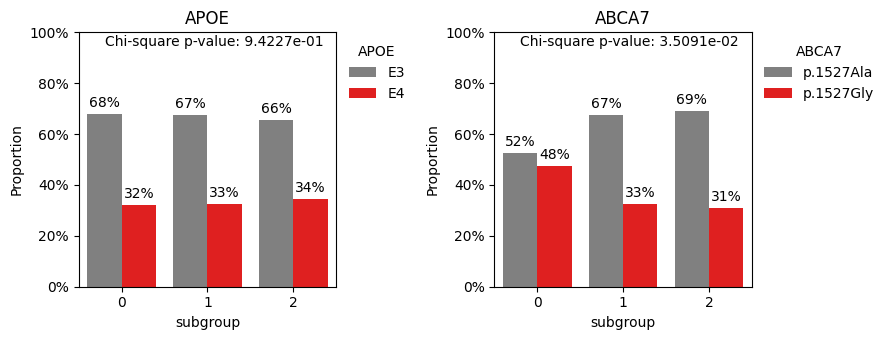

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(9, 3.5), sharey=False, sharex=True)

# flatten into a 1-D array of length 8
axes_flat = axes.flatten()

variables = ['APOE', 'ABCA7']

# only take the first 5 axes (or whatever subset you need)
for ax, var in zip(axes_flat[:len(variables)], variables):
    plot_cat_proportions(
        data=meta,
        cat_col='label',
        hue_col=var,
        palette=['grey', 'red'],
        ax=ax
    )
    ax.set_xlabel('subgroup')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False, title=var)
    # Annotation with test results
    table = pd.crosstab(meta['label'], meta[var])

    chi2, p, dof, expected = chi2_contingency(table)
    textstr = (
       # f"Chi-square statistic: {chi2:.4f}\n"
        f"Chi-square p-value: {p:.4e}"
    )
    #props = dict(boxstyle='round',facecolor='white', alpha=0.5)
    ax.text(0.95, 0.99, textstr, transform=ax.transAxes,
            ha='right', va='top')
    
    ax.set_title(var)

plt.tight_layout()
#plt.show()
plt.savefig('/Users/djuna/Documents/Maydell-MIT-PhD-Thesis/MIT-thesis-template/ch4_figs/rosmap_genetic_differences.png', dpi=300)


Bio insights

In [33]:
genes = np.load('../../subgroups_data/rosmap_mathys400/Xt/Xt_genesAvs_matrix.npy')
celltypes = np.load('../../subgroups_data/rosmap_mathys400/Xt/Xt_genesAvs_celltype.npy')
projids = np.load('../../subgroups_data/rosmap_mathys400/Xt/Xt_genesAvs_projids.npy')
genenames = np.load('../../subgroups_data/rosmap_mathys400/Xt/Xt_genesAvs_genenames.npy', allow_pickle=True)
projid_dict = np.load('../../subgroups_data/rosmap_mathys400/variable_encodings/projid_dictionary.npy', allow_pickle=True)
projid_dict = dict(zip(projid_dict[:,1], projid_dict[:,0]))
celltype_dict = np.load('../../subgroups_data/rosmap_mathys400/variable_encodings/celltype_dictionary.npy', allow_pickle=True)
celltype_dict = dict(zip(celltype_dict[:,1], celltype_dict[:,0]))
projids = np.array([projid_dict[x] for x in projids])

Sanity check - are we identifying mito pathways up in the common variant (irrespective of AD status?)

In [418]:
meta = pd.DataFrame(data.descriptive_data.copy())
dictionary = dict(zip(mapping['projid'], mapping['WGS_id']))

meta['WGS_id'] = meta['projid'].map(dictionary)
rs = geno[geno['ID']=='rs3752246'].T
dictionary = dict(zip(rs.index, rs[137798]))
meta['rs3752246'] = meta['WGS_id'].map(dictionary)
meta['ABCA7'] = ['p.1527Gly' if x!='1/1' else 'p.1527Ala' for x in meta['rs3752246']]

all_res = {}
for celltype in ['1', '2', '3']:
    print(celltype)
    index = celltypes==celltype

    genes_subset = genes[index]
    projid_subset = projids[index]
    df = pd.DataFrame(genes_subset)
    df.index = projid_subset
    df.columns = genenames[0]
    df_subset = df.loc[data.descriptive_data['projid']]
    df_subset = df_subset.iloc[:,np.array(np.sum(df_subset==0, axis=0)<=5)]

    temp_res = {}
    for partition in ['ABCA7']:
            i = np.array(meta[partition]=='p.1527Gly')

            out = {}
            for gene in df_subset.columns:
                x = df_subset[gene]
                stat_ind, p_ind = ttest_ind(x[i], x[np.invert(i)], equal_var=False)
                logfc = np.log2(np.mean(x[i])/np.mean(x[np.invert(i)]))
                out[gene] = {'stat_ind': stat_ind, 'p_ind': p_ind, 'logfc': logfc}

            res = pd.DataFrame(out).T
            res['score'] = np.sign(res['logfc'])*(-np.log10(res['p_ind']))
            res = res.sort_values(by='score', ascending=False)

            # paths
            pre_res = gp.prerank(
                rnk=res['score'],
                gene_sets=gs,
                processes=4,        # parallel threads
                permutation_num=1000,
                outdir=None,        # don’t write files, return DataFrame
            )

            res_out = pre_res.res2d[pre_res.res2d['FDR q-val']<0.05]
            temp_res[partition] = res_out

    all_res[celltype_dict[celltype]] = temp_res

print(all_res['Excitatory_neurons_set1'])

1


/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/659859147.py:39: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(


2


/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/659859147.py:39: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(


3


/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/659859147.py:39: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(


{'ABCA7':        Name                                               Term        ES  \
0   prerank               Cytoplasmic Ribosomal Proteins WP477  0.734801   
1   prerank  Electron Transport Chain OXPHOS System In Mito...  0.715003   
2   prerank                    Oxidative Phosphorylation WP623  0.700757   
3   prerank  Mitochondrial Complex I Assembly Model OXPHOS ...  0.613474   
4   prerank                       Proteasome Degradation WP183   0.58578   
5   prerank            Nonalcoholic Fatty Liver Disease WP4396  0.492741   
6   prerank           Mitochondrial Complex IV Assembly WP4922  0.658333   
7   prerank    Alzheimer 39 S Disease And miRNA Effects WP2059  0.448856   
8   prerank                      Alzheimer 39 S Disease WP5124  0.448856   
9   prerank  Parkin Ubiquitin Proteasomal System Pathway WP...  0.529164   
10  prerank                          Translation Factors WP107  0.539082   
11  prerank     Metabolic Reprogramming In Colon Cancer WP4290  0.574065   
12

In [35]:
import gseapy as gp
# install: pip install gseapy

import pandas as pd
import gseapy as gp
from scipy.stats import ttest_ind



# 1) see what libraries are available for Human:
#libs = gp.get_library_name(organism='Human')
#print(libs)  # e.g. ['KEGG_2016', 'GO_Biological_Process_2021', …]

# 2) download one into memory (as a dict of lists):
gs = gp.get_library(
    name='WikiPathways_2024_Human',#'GO_Biological_Process_2021', #'HumanCyc_2016',#'WikiPathways_2024_Human',
    organism='Human'
)

In [41]:
# compare subgroup 1 and 2
all_res = {}
for celltype in np.unique(celltypes)[np.unique(celltypes)!='8']:
    print(celltype)
    index = celltypes==celltype

    genes_subset = genes[index]
    projid_subset = projids[index]
    df = pd.DataFrame(genes_subset)
    df.index = projid_subset
    df.columns = genenames[0]
    df_subset = df.loc[data.descriptive_data[index_grp_1]['projid']]
    df_subset = df_subset.iloc[:,np.array(np.sum(df_subset==0, axis=0)<=5)]
    df_subset = df_subset[partitions!=0]

    i = partitions[partitions!=0]==2

    out = {}
    for gene in df_subset.columns:
        x = df_subset[gene]
        stat_ind, p_ind = ttest_ind(x[i], x[np.invert(i)], equal_var=False)
        logfc = np.log2(np.mean(x[i])/np.mean(x[np.invert(i)]))
        out[gene] = {'stat_ind': stat_ind, 'p_ind': p_ind, 'logfc': logfc}

    res = pd.DataFrame(out).T
    res['score'] = np.sign(res['logfc'])*(-np.log10(res['p_ind']))
    res = res.sort_values(by='score', ascending=False)

    # paths
    pre_res = gp.prerank(
        rnk=res['score'],
        gene_sets=gs,
        processes=4,        # parallel threads
        permutation_num=1000,
        min_size=3,
        outdir=None,        # don’t write files, return DataFrame
    )


    all_res[celltype_dict[celltype]] = pre_res.res2d

0


/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_26025/2135837325.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(


1


/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_26025/2135837325.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(


2


/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_26025/2135837325.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(


3


/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_26025/2135837325.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(


4


/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_26025/2135837325.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(


5


/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_26025/2135837325.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(


6


/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_26025/2135837325.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(


7


/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_26025/2135837325.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(


In [51]:
all_res.keys()

dict_keys([np.str_('Astrocytes'), np.str_('Excitatory_neurons_set1'), np.str_('Excitatory_neurons_set2'), np.str_('Excitatory_neurons_set3'), np.str_('Immune_cells'), np.str_('Inhibitory_neurons'), np.str_('OPCs'), np.str_('Oligodendrocytes')])

In [55]:
all_res['Inhibitory_neurons'].sort_values(by='FDR q-val', ascending=True)[:50]

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,Cytoplasmic Ribosomal Proteins WP477,0.740064,3.952577,0.0,0.0,0.0,56/74,13.93%,RPL27A;RPL31;RPS11;RPS15;RPLP2;UBA52;RPS5;RPL1...
1,prerank,Electron Transport Chain OXPHOS System In Mito...,0.692108,3.887831,0.0,0.0,0.0,50/72,14.72%,ATP5F1D;COX6B1;NDUFB7;COX5B;NDUFB10;COX6C;NDUF...
2,prerank,Oxidative Phosphorylation WP623,0.705098,3.448059,0.0,0.0,0.0,33/42,18.37%,ATP5F1D;NDUFB7;NDUFB10;NDUFS5;ATP5F1A;NDUFA3;A...
3,prerank,Nonalcoholic Fatty Liver Disease WP4396,0.422241,2.379478,0.0,0.003777,0.008,43/100,11.87%,COX6B1;NDUFB7;COX5B;NDUFB10;COX6C;CYC1;NDUFS5;...
4,prerank,Proteasome Degradation WP183,0.458965,2.262136,0.0,0.008057,0.022,16/44,12.32%,PSMD10;PSMC3;UBC;UCHL1;UBB;PSMB6;PSMB4;PSMA4;U...
5,prerank,Mitochondrial Complex IV Assembly WP4922,0.562581,2.225554,0.0,0.009512,0.031,9/19,6.94%,COX6B1;COX5B;COX6C;COX4I1;COX7C;COX7B;COX7A2;C...
7,prerank,Glycolysis And Gluconeogenesis WP534,0.532925,2.169211,0.0,0.010072,0.045,16/26,17.84%,ENO2;GAPDH;TPI1;PGAM1;PKM;LDHB;LDHA;PGK1;ENO1;...
6,prerank,Exercise Induced Circadian Regulation WP410,0.476342,2.180224,0.0,0.011271,0.044,17/35,17.77%,CBX3;GSTP1;UGP2;PSMA4;PER1;EIF4G2;SUMO3;AZIN1;...
9,prerank,Mitochondrial Complex I Assembly Model OXPHOS ...,0.424913,2.11592,0.0,0.012086,0.069,22/45,13.85%,NDUFAF3;NDUFB7;NDUFB10;NDUFS5;DMAC1;NDUFA3;NDU...
10,prerank,Pathogenic Escherichia Coli Infection WP2272,0.440318,2.105001,0.0,0.012361,0.078,16/33,14.59%,TUBA1B;TUBB4A;TUBB4B;ACTB;TUBB;TUBA4A;RHOA;ACT...


In [531]:
all_res = {}
for celltype in np.unique(celltypes)[np.unique(celltypes)!='8']:
    print(celltype)
    index = celltypes==celltype

    genes_subset = genes[index]
    projid_subset = projids[index]
    df = pd.DataFrame(genes_subset)
    df.index = projid_subset
    df.columns = genenames[0]
    df_subset = df.loc[data.descriptive_data[index_grp_1]['projid']]
    df_subset = df_subset.iloc[:,np.array(np.sum(df_subset==0, axis=0)<=5)]

    temp_res = {}
    for partition in [0,1,2]:
            i = partitions==partition

            out = {}
            for gene in df_subset.columns:
                x = df_subset[gene]
                stat_ind, p_ind = ttest_ind(x[i], x[np.invert(i)], equal_var=False)
                logfc = np.log2(np.mean(x[i])/np.mean(x[np.invert(i)]))
                out[gene] = {'stat_ind': stat_ind, 'p_ind': p_ind, 'logfc': logfc}

            res = pd.DataFrame(out).T
            res['score'] = np.sign(res['logfc'])*(-np.log10(res['p_ind']))
            res = res.sort_values(by='score', ascending=False)

            # paths
            pre_res = gp.prerank(
                rnk=res['score'],
                gene_sets=gs,
                processes=4,        # parallel threads
                permutation_num=1000,
                min_size=3,
                outdir=None,        # don’t write files, return DataFrame
            )

            res_out = pre_res.res2d[pre_res.res2d['FDR q-val']<0.25]
            temp_res[partition] = res_out

    all_res[celltype_dict[celltype]] = temp_res

0


/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1010866964.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1010866964.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1010866964.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(


1


/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1010866964.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1010866964.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1010866964.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(


2


/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1010866964.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1010866964.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1010866964.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(


3


/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1010866964.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1010866964.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1010866964.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(


4


/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1010866964.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1010866964.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1010866964.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(


5


/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1010866964.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1010866964.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1010866964.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(


6


/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1010866964.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1010866964.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1010866964.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(


7


/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1010866964.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1010866964.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1010866964.py:30: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(


In [532]:
all_res.keys()

dict_keys([np.str_('Astrocytes'), np.str_('Excitatory_neurons_set1'), np.str_('Excitatory_neurons_set2'), np.str_('Excitatory_neurons_set3'), np.str_('Immune_cells'), np.str_('Inhibitory_neurons'), np.str_('OPCs'), np.str_('Oligodendrocytes')])

In [562]:
clust = 2
celltype = 'Oligodendrocytes'
all_res[celltype][clust][all_res[celltype][clust]['NES']>1]

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,Cytoplasmic Ribosomal Proteins WP477,0.753822,3.703782,0.0,0.0,0.0,66/78,14.28%,RPL4;RPL27A;RPL31;RPS11;RPL27;RPL38;RPL35;RPS1...
1,prerank,Electron Transport Chain OXPHOS System In Mito...,0.572624,2.920647,0.0,0.0,0.0,46/73,14.60%,NDUFA6;UQCRQ;COX4I1;UQCR10;COX5B;COX6C;ATP5IF1...
2,prerank,Oxidative Phosphorylation WP623,0.615387,2.879935,0.0,0.0,0.0,28/42,14.60%,NDUFA6;ATP5F1D;NDUFB6;NDUFA3;NDUFB9;ATP5MC2;ND...
3,prerank,Mitochondrial Complex IV Assembly WP4922,0.592834,2.386431,0.0,0.000523,0.002,12/23,10.93%,SMIM20;COA3;COX4I1;COX5B;COX6C;COX7A2;COX6B1;C...
4,prerank,Proximal Tubule Transport WP4917,0.549886,2.212014,0.0,0.006691,0.031,6/23,5.32%,ATP6V0B;ATP6V1G1;ATP6V1E1;SLC4A4;ATP6V1F;SLC47A1
5,prerank,Dual Hijack Model Of Vif In HIV Infection WP3300,0.840072,2.17041,0.0,0.009235,0.05,4/7,6.88%,UBB;ELOB;ELOC;RBX1
6,prerank,HIF1A And PPARG In Cardiac Hypertropthy WP2456,0.867318,2.140455,0.0,0.011202,0.071,3/6,2.82%,TPI1;GAPDH;GPD1
7,prerank,Omega 9 Fatty Acid Synthesis WP4724,0.680364,2.072739,0.0,0.018819,0.13,2/11,0.04%,SCD;ELOVL1
8,prerank,Glial Cell Differentiation WP2276,0.784849,2.055331,0.0,0.019284,0.146,3/7,6.44%,CNP;PLP1;MAG
9,prerank,Cellular Proteostasis WP4918,0.797089,2.000051,0.00431,0.027079,0.215,5/6,12.11%,PFDN4;PFDN2;PFDN6;PFDN5;VBP1


In [451]:
print(libs) 

['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_2023', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'COMPARTMENTS_Curated_2025', 'COMPARTMENTS_Experimental_2025', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_2024', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DGIdb_Drug_Targets_2024', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_CRISPR_GeneDependency_CellLines_2023', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_C

/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/2986511216.py:10: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(


,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes


In [333]:
pre_res.res2d.sort_values(by='NOM p-val', ascending=True)[:50]

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,Metabolic Reprogramming In Colon Cancer WP4290,-0.539854,-1.870623,0.0,0.116193,0.119,7/29,4.39%,PKM;PFKL;TALDO1;GAPDH;SLC2A1;PSPH;ACLY
1,prerank,NO cGMP PKG Mediated Neuroprotection WP4008,-0.547578,-1.772659,0.0,0.144149,0.263,8/21,13.51%,CAMK2B;DLG4;GRIN1;PDE3A;BAD;XIAP;CAMK2G;CYCS
5,prerank,Oxidative Phosphorylation WP623,-0.444647,-1.64771,0.0,0.205085,0.543,19/41,21.09%,NDUFA2;ATP6AP1;NDUFA5;NDUFB7;NDUFB6;NDUFS5;ATP...
4,prerank,B Cell Receptor Signaling WP23,0.530773,1.665675,0.00119,0.573108,0.585,33/54,31.69%,PLCG2;MAX;VAV2;LYN;CBL;CDC42;GAB1;MAP2K2;CHUK;...
2,prerank,DNA IR Damage And Cellular Response Via ATR WP...,0.566866,1.680115,0.002519,0.926903,0.521,13/37,20.54%,SMARCC2;SP1;BARD1;UIMC1;PML;MDC1;MCPH1;PPM1D;S...
14,prerank,Androgen Receptor Network In Prostate Cancer W...,0.467922,1.531472,0.004624,0.861386,0.967,27/67,26.98%,SMARCC2;RAP1A;SP1;BARD1;JAK1;SMAD3;HSD17B7;GAB...
6,prerank,NRF2 Pathway WP2884,-0.402687,-1.597999,0.005155,0.232736,0.659,17/47,18.58%,PRDX6;SLC6A8;GCLC;SLC2A1;GSTA4;BLVRB;SLC6A1;TX...
18,prerank,Smith Magenis And Potocki Lupski Syndrome Copy...,0.436998,1.485764,0.009029,0.800075,0.992,30/91,23.05%,CRY1;SHMT1;GDI2;TFEB;WDR26;ITPK1;COPS3;HBP1;IF...
11,prerank,Integrin Mediated Cell Adhesion WP185,0.489659,1.550832,0.010843,1.0,0.935,21/56,23.65%,RAP1A;CAPN7;MAPK12;CAPN2;VAV2;SHC3;ILK;ARHGEF7...
10,prerank,P38 MAPK Signaling WP400,0.579218,1.559183,0.011905,1.0,0.923,13/22,24.69%,MAX;TRAF2;CDC42;RPS6KA5;MAP2K4;RAC1;ATF2;TGFB2...


In [266]:
from statsmodels.stats.multitest import multipletests

# suppose you have a DataFrame `ttest_df` with a column 'p_value'
pvals = temp['p_ind'].values

# run FDR-BH correction
reject, pvals_fdr, alphacSidak, alphacBonf = multipletests(
    pvals,
    alpha=0.05,
    method='fdr_bh'    # Benjamini-Hochberg
)

In [267]:
temp['fdr'] = pvals_fdr

In [269]:
temp[temp['logfc']<0].sort_values(by='p_ind', ascending=True)[:30]

,stat_ind,p_ind,logfc,fdr
SOX8,-3.566286,0.000443,-0.197562,0.999888
AC069133.1,-3.328632,0.001038,-0.191606,0.999888
LINC01934,-3.107088,0.002217,-0.233276,0.999888
AC009283.1,-3.035351,0.002776,-0.187134,0.999888
SNORC,-2.953725,0.003486,-0.111725,0.999888
AC018638.6,-2.861060,0.004710,-0.225646,0.999888
FAM110C,-2.845844,0.004885,-0.179684,0.999888
TTC3,-2.788543,0.005693,-0.031583,0.999888
SDC3,-2.788499,0.005794,-0.164718,0.999888
ORAI3,-2.787432,0.005818,-0.190954,0.999888


In [166]:
df2 = df_subset.copy()
df2['cluster'] = partitions
cluster_means2 = (
    df2
    .groupby('cluster')
    .mean()
    #.drop(columns='cluster')  # drop the grouping column if you like
)

In [179]:
x = np.log2(cluster_means2.loc[0]/np.sum(cluster_means2.loc[1:]))

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [183]:
cluster_means2

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.4,AL732372.1,OR4F29,AC114498.1,...,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231C
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000228,0.0,0.0,0.028481,0.0,0.000085,0.0,0.000000,0.0,0.002108,...,0.121077,0.000048,0.029789,0.000002,0.002453,0.0,0.0,0.041141,0.00001,0.000012
1,0.000033,0.0,0.0,0.038354,0.0,0.000197,0.0,0.000000,0.0,0.000848,...,0.129062,0.000000,0.032613,0.000000,0.002197,0.0,0.0,0.040398,0.00000,0.000000
2,0.000208,0.0,0.0,0.033213,0.0,0.000015,0.0,0.000048,0.0,0.002205,...,0.097634,0.000000,0.029850,0.000000,0.001403,0.0,0.0,0.037337,0.00000,0.000000


In [121]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_means2)
pca = PCA(n_components=3)  # adjust n_components as needed
X_pca = pca.fit_transform(X_scaled)

In [141]:
x = genenames[0]

<Axes: >

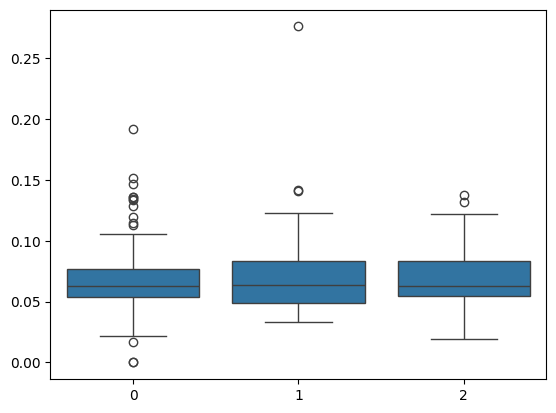

In [352]:
sns.boxplot(x=partitions, y=np.array(df_subset['NDUFAB1']))

/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1295104059.py:1: RuntimeWarning: divide by zero encountered in log2
  plot_2D_embedding(weights, index_grp_1, np.log2(np.array(df_subset['NDUFAB1'])), '', 'clusters', cmap = 'rocket', s=15, alpha=1)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/matplotlib/colors.py:2294: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/matplotlib/colors.py:2295: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/matplotlib/colors.py:2294: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/matplotlib/colors.py:2295: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/Users/djuna/Documents/temp/subgroups/utils/plotting.py:86: Us

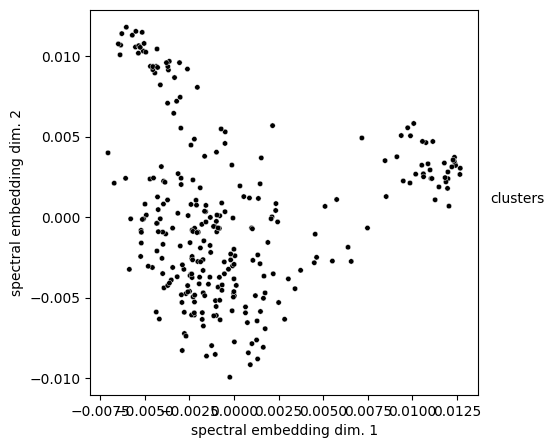

In [353]:
plot_2D_embedding(weights, index_grp_1, np.log2(np.array(df_subset['NDUFAB1'])), '', 'clusters', cmap = 'rocket', s=15, alpha=1)
